# Accuracy Summary Table

|      Base Setup     	|     	|     	|     	|         	|            	|     	|     	|     	|         	|
|:-------------------:	|-----	|-----	|-----	|---------	|------------	|-----	|-----	|-----	|---------	|
| SciKit              	|  1  	|  2  	|  3  	| Average 	| Tensorflow 	|  1  	|  2  	|  3  	| Average 	|
| K Nearest Neighbors 	| 100 	| 100 	| 100 	|   100   	| LSTM       	| 100 	| 100 	| 100 	|   100   	|
| Linear & RBF SVM    	| 100 	| 100 	| 100 	|   100   	| GRU        	| 100 	| 100 	| 100 	|   100   	|
| QDA                 	| 100 	| 100 	| 100 	|   100   	| Simple RNN 	| 100 	| 100 	| 100 	|   100   	|
| Gaussian Process    	| 100 	| 100 	| 100 	|   100   	| Bi LSTM    	| 100 	| 100 	| 100 	|   100   	|
| Decision Tree       	| 100 	| 100 	| 100 	|   100   	| Bi GRU     	| 100 	| 100 	| 100 	|   100   	|
| Random Forest       	| 100 	| 100 	| 100 	|   100   	| Bi RNN     	| 100 	| 100 	| 100 	|   100   	|
| Neural Net          	| 100 	| 100 	| 100 	|   100   	| Dense      	| 100 	| 100 	| 100 	|   100   	|
| AdaBoost            	| 100 	| 100 	| 100 	|   100   	|            	|     	|     	|     	|         	|
| Naive Bayes         	| 100 	| 100 	| 100 	|   100   	|            	|     	|     	|     	|         	|



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import pickle 

from tqdm import tqdm

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam 

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, minmax_scale

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.datasets import load_digits

from tensorflow.keras.callbacks import ModelCheckpoint

from scipy.ndimage import convolve

from scikeras.wrappers import KerasClassifier

from keras.utils import to_categorical

import collections 
import random

2024-05-01 13:21:51.388143: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 13:21:52.445203: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 13:21:55.150426: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 13:21:58.314462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Noisy Data

In [29]:
csv_filename = "MXNWSS.csv"
df = pd.read_csv(csv_filename)

window_length = 5 
t_arr = df["value"].to_numpy().reshape(-1, 1)
SS = StandardScaler()

t_arr = SS.fit_transform(t_arr).flatten()

X = []
y = []

# print("Rearranging Data")
for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append([j])
    X.append(t_row)
    y.append(t_arr[i + window_length])

X = np.array(X)
y = np.array(y)

# print(X.shape, y.shape)

X_train = X[:600]
X_valid = X[:800]
X_test = X[:1000]

y_train = y[:600]
y_valid = y[:800]
y_test = y[:1000]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

# LSTM

In [ ]:
model = Sequential([
    layers.InputLayer((window_length, 1)),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(4),
    layers.Dense(1)
])

# print(model.summary())

cp = ModelCheckpoint("LSTMTestModel/", save_best_only=True)
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.0001),
    metrics = [RootMeanSquaredError()]
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10,
    callbacks = [cp],
    verbose = 2
)



In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(history.history["root_mean_squared_error"], label="RMSE")
plt.plot(history.history["val_root_mean_squared_error"], label="Val RMSE")
plt.title("Training History")
plt.legend()
plt.show()

view_length = 100
plt.figure(figsize=(10, 5))
plt.plot(SS.inverse_transform(model.predict(X_test))[:view_length], label="Model Output")
plt.plot(y_test[:view_length], label="Actual")
plt.title("Viewing Predictions")
plt.legend()
plt.show()

# RBM Playground

(1293, 64) (144, 64) (360, 64) (1293,) (144,) (360,)
Accuracy 0.6583333333333333


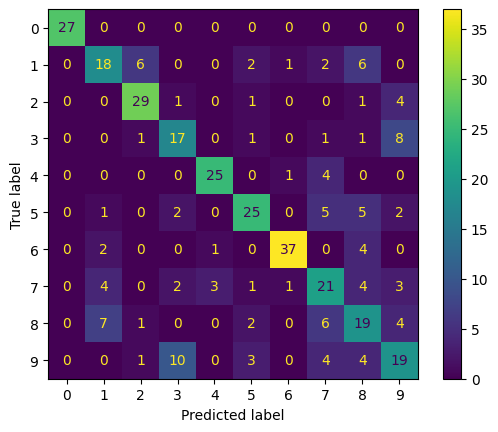

In [16]:
X, y = load_digits(return_X_y = True)

# X = np.asarray(X, "float32")
# X = minmax_scale(X, feature_range=(0, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

# ("random forest", RandomForestClassifier()),
# ("ada boost", AdaBoostClassifier()),   
# ("gaussian process", GaussianProcessClassifier()),
# ("decision tree", DecisionTreeClassifier()),
# ("mlp", MLPClassifier()),
# ("svm", SVC())

# print("Before RBM: ", X_train[0])

pipe = Pipeline([
    ("mms1", MinMaxScaler()),
    ("rbm1", BernoulliRBM(n_components=640, learning_rate = 0.1, n_iter = 100, verbose = False, random_state = 0)),
    ("mms2", MinMaxScaler()),
    ("rbm2", BernoulliRBM(n_components=640, learning_rate = 0.1, n_iter = 100, verbose = False, random_state = 0)),
    ("mms3", MinMaxScaler()),
    ("rbm3", BernoulliRBM(n_components=640, learning_rate = 0.1, n_iter = 100, verbose = False, random_state = 0)),
    ("mms4", MinMaxScaler()),
    ("rbm4", BernoulliRBM(n_components=640, learning_rate = 0.1, n_iter = 100, verbose = False, random_state = 0)),
    ("mms5", MinMaxScaler()),
    ("rbm5", BernoulliRBM(n_components=640, learning_rate = 0.1, n_iter = 100, verbose = False, random_state = 0)),
    ("final_classifier", RandomForestClassifier(random_state = 0))
])
# print("After RBM: ",X_train[0])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))

r_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = r_cm)

disp.plot()
plt.show()

# .91, .90, .91 -128, 10
# .89, .88, .90 -256, 10
# .93, .91, .90 -64, 10
# .89, .89, .92 -32, 10
# .85, .85, .85 -64, 64, (10)
# .86, .86, .86 -64, 64, (10)
# .88, .91, .87 -64, 64, (10, 20)
# .91, .91,

# SciKit

In [2]:
FULL_DATA = False 
LE = LabelEncoder()
WINDOW_LENGTH = 5
ADD_ELEMENTS = True


concatenated_data = pd.read_csv("Concatenated Data.csv")

if FULL_DATA:
    raw_dataset = concatenated_data[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "sealevelpressure", "conditions"]]
else:
    raw_dataset = concatenated_data[["temp", "feelslike", "humidity", "windspeed", "sealevelpressure", "conditions"]]

raw_dataset["conditions"] = [word.replace(", ", "\n") if ("," in word) else word for word in raw_dataset["conditions"]]
raw_dataset["conditions"] =  LE.fit_transform(raw_dataset["conditions"])

t_arr = raw_dataset.copy().to_numpy()
X = []
y = []

for i in range(len(t_arr) - WINDOW_LENGTH):
    t_row = []
    for j in t_arr[i : i + WINDOW_LENGTH]:
        t_row.append(j[:-1])
    t_row = np.array(t_row).flatten()
    X.append(t_row)
    y.append(t_arr[i + WINDOW_LENGTH][-1])

X = np.array(X, "float32")
X = minmax_scale(X, feature_range=(0, 1))
y = np.array(y)

counts = dict(collections.Counter(y))
max_count = max(counts.values())

if ADD_ELEMENTS:
    for key, value in counts.items():
        curX = []
        curY = []
        li, = np.where(y == key)
        for i in range((max_count - value) * 10):
            ci = random.choice(li)
            curX.append(X[ci])
            curY.append(y[ci])
        tX = X.tolist()
        tY = y.tolist()
        tX.extend(curX)
        tY.extend(curY)
        X = np.array(tX)
        y = np.array(tY)        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


/tmp/ipykernel_1309/2226633099.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset["conditions"] = [word.replace(", ", "\n") if ("," in word) else word for word in raw_dataset["conditions"]]
/tmp/ipykernel_1309/2226633099.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset["conditions"] =  LE.fit_transform(raw_dataset["conditions"])


(29372, 25) (7344, 25) (29372,) (7344,)


In [3]:
classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("RBF SVM", SVC()),
    ("LINEAR SVM", SVC(kernel = "linear")),
    ("DECISION TREE", DecisionTreeClassifier()),
    ("RANDOM FOREST", RandomForestClassifier()),
    ("MLP", MLPClassifier()),
    ("ADA BOOST", AdaBoostClassifier()),    
    ("LOGISTIC", LogisticRegression())
]

Results = {}
for name, _ in classifiers:
    Results[name] = {
        "CONSTANT" : {

        },
        "INCREASING" : {

        },
        "DECREASING" : {

        }
    }

for (name, _clf) in classifiers:

    for rbm_layer in range(0, 5):
        comb = []

        # Constant
        for j in range(1, rbm_layer):
            comb.append((f"mms{j}", MinMaxScaler()))
            comb.append((f"rbm{j}", BernoulliRBM(n_components = X_train.shape[1], learning_rate = 0.01, n_iter = 10, verbose = 0)))

        comb.append((name, _clf))
        predictor = Pipeline(comb)

        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        Results[name]["CONSTANT"][rbm_layer] = accuracy
        print(f"{name}\tConstant\tLayer: {rbm_layer}\tAccuracy: {accuracy}")
        
        # Increasing
        comb = []
        for j in range(1, rbm_layer):
            comb.append((f"mms{j}", MinMaxScaler()))
            comb.append((f"rbm{j}", BernoulliRBM(n_components = X_train.shape[1] * j, learning_rate = 0.01, n_iter = 10, verbose = 0)))

        comb.append((name, _clf))
        predictor = Pipeline(comb)

        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        Results[name]["INCREASING"][rbm_layer] = accuracy
        print(f"{name}\tIncreasing\tLayer: {rbm_layer}\tAccuracy: {accuracy}")

        # Decreasing
        comb = []
        for j in range(1, rbm_layer):
            comb.append((f"mms{j}", MinMaxScaler()))
            comb.append((f"rbm{j}", BernoulliRBM(n_components = X_train.shape[1] * rbm_layer - j, learning_rate = 0.01, n_iter = 10, verbose = 0)))

        comb.append((name, _clf))
        predictor = Pipeline(comb)

        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        Results[name]["DECREASING"][rbm_layer] = accuracy
        print(f"{name}\tDecreasing\tLayer: {rbm_layer}\tAccuracy: {accuracy}")

        
    


# predictor.fit(X_train, y_train)
# y_pred = predictor.predict(X_test)

# pipe.fit(X_train, y_train)

# y_pred = pipe.predict(X_test)
# r_cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix = r_cm, display_labels = LE.classes_)

with open("SciKitAccuracySaves.pkl", "wb") as f:
    pickle.dump(Results, f)


KNN	Constant	Layer: 0	Accuracy: 95.7107843137255
KNN	Increasing	Layer: 0	Accuracy: 95.7107843137255
KNN	Decreasing	Layer: 0	Accuracy: 95.7107843137255
KNN	Constant	Layer: 1	Accuracy: 95.7107843137255
KNN	Increasing	Layer: 1	Accuracy: 95.7107843137255
KNN	Decreasing	Layer: 1	Accuracy: 95.7107843137255
KNN	Constant	Layer: 2	Accuracy: 94.8937908496732
KNN	Increasing	Layer: 2	Accuracy: 94.880174291939
KNN	Decreasing	Layer: 2	Accuracy: 94.66230936819173
KNN	Constant	Layer: 3	Accuracy: 94.71677559912854
KNN	Increasing	Layer: 3	Accuracy: 94.83932461873638
KNN	Decreasing	Layer: 3	Accuracy: 94.49891067538127
KNN	Constant	Layer: 4	Accuracy: 94.36274509803921
KNN	Increasing	Layer: 4	Accuracy: 94.28104575163398
KNN	Decreasing	Layer: 4	Accuracy: 94.18572984749454
RBF SVM	Constant	Layer: 0	Accuracy: 90.19607843137256
RBF SVM	Increasing	Layer: 0	Accuracy: 90.19607843137256
RBF SVM	Decreasing	Layer: 0	Accuracy: 90.19607843137256
RBF SVM	Constant	Layer: 1	Accuracy: 90.19607843137256
RBF SVM	Increasing	

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Constant	Layer: 0	Accuracy: 93.34150326797386


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Increasing	Layer: 0	Accuracy: 92.97385620915033


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Decreasing	Layer: 0	Accuracy: 92.18409586056644


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Constant	Layer: 1	Accuracy: 92.66067538126362


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Increasing	Layer: 1	Accuracy: 92.26579520697167


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Decreasing	Layer: 1	Accuracy: 91.24455337690632
MLP	Constant	Layer: 2	Accuracy: 53.78540305010894
MLP	Increasing	Layer: 2	Accuracy: 53.649237472766885
MLP	Decreasing	Layer: 2	Accuracy: 51.53867102396514


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Constant	Layer: 3	Accuracy: 56.91721132897604


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Increasing	Layer: 3	Accuracy: 58.10185185185185


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Decreasing	Layer: 3	Accuracy: 60.811546840958606


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Constant	Layer: 4	Accuracy: 54.79302832244009


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP	Increasing	Layer: 4	Accuracy: 62.79956427015251


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


MLP	Decreasing	Layer: 4	Accuracy: 56.94444444444444
ADA BOOST	Constant	Layer: 0	Accuracy: 80.66448801742919


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Increasing	Layer: 0	Accuracy: 80.66448801742919


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Decreasing	Layer: 0	Accuracy: 80.66448801742919


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Constant	Layer: 1	Accuracy: 80.66448801742919


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Increasing	Layer: 1	Accuracy: 80.66448801742919


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Decreasing	Layer: 1	Accuracy: 80.66448801742919


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Constant	Layer: 2	Accuracy: 73.0255991285403


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Increasing	Layer: 2	Accuracy: 74.31917211328975


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Decreasing	Layer: 2	Accuracy: 73.39324618736384


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Constant	Layer: 3	Accuracy: 77.01525054466231


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Increasing	Layer: 3	Accuracy: 69.93464052287581


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Decreasing	Layer: 3	Accuracy: 69.24019607843137


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Constant	Layer: 4	Accuracy: 75.2995642701525


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Increasing	Layer: 4	Accuracy: 76.19825708061002


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


ADA BOOST	Decreasing	Layer: 4	Accuracy: 78.56753812636165


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOGISTIC	Constant	Layer: 0	Accuracy: 76.52505446623094


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOGISTIC	Increasing	Layer: 0	Accuracy: 76.52505446623094


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOGISTIC	Decreasing	Layer: 0	Accuracy: 76.52505446623094


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOGISTIC	Constant	Layer: 1	Accuracy: 76.52505446623094


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOGISTIC	Increasing	Layer: 1	Accuracy: 76.52505446623094


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LOGISTIC	Decreasing	Layer: 1	Accuracy: 76.52505446623094
LOGISTIC	Constant	Layer: 2	Accuracy: 53.96241830065359
LOGISTIC	Increasing	Layer: 2	Accuracy: 54.180283224400874
LOGISTIC	Decreasing	Layer: 2	Accuracy: 52.65522875816993
LOGISTIC	Constant	Layer: 3	Accuracy: 53.649237472766885
LOGISTIC	Increasing	Layer: 3	Accuracy: 53.635620915032675
LOGISTIC	Decreasing	Layer: 3	Accuracy: 54.20751633986928
LOGISTIC	Constant	Layer: 4	Accuracy: 51.06209150326797
LOGISTIC	Increasing	Layer: 4	Accuracy: 49.78213507625273
LOGISTIC	Decreasing	Layer: 4	Accuracy: 55.54193899782135


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [3]:
def BuildGenericModel(input_dimension, output_dimension, layerType, Kernel_Count = 64, Layer_Count = 2, Dense_Flag = False, Bidirectional_Flag = False):
    PredictorModel = Sequential()
    PredictorModel.add(layers.InputLayer((input_dimension, 1)))

    if Dense_Flag:
        # No Return Sequences for Dense Layer
        for i in range(1, Layer_Count):
            PredictorModel.add(layerType(Kernel_Count))

        # Final Layer
        PredictorModel.add(layerType(Kernel_Count))
        
    elif Bidirectional_Flag:
        # Return Sequences (Only Adds if More than 1 Layers)
        for i in range(1, Layer_Count):
            PredictorModel.add(layerType)

        # Add a Final SimpleRNN Layer at End of Bidirectional Layers
        PredictorModel.add(layers.SimpleRNN(Kernel_Count))

    else:
        # Return Sequences (Only Adds if More than 1 Layers)
        for i in range(1, Layer_Count):
            PredictorModel.add(layerType(Kernel_Count, return_sequences = True))
        
        # Final Layer
        PredictorModel.add(layerType(Kernel_Count))

    # Flatten Layer
    PredictorModel.add(layers.Flatten()) 

    # Output Dimension
    PredictorModel.add(layers.Dense(output_dimension, activation = "softmax"))

    # Compile Model
    PredictorModel.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return PredictorModel

def buildModels(X_train_shape, Y_train_shape, Kernel = 64, Layer_Count = 2):
    LSTMModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.LSTM, Kernel, Layer_Count)
    GRUModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.GRU, Kernel, Layer_Count)
    SimpleRNNModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.SimpleRNN, Kernel, Layer_Count)
    BiLSTMModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.Bidirectional(layers.LSTM(Kernel, return_sequences = True)), Kernel, Layer_Count, Bidirectional_Flag = True)
    BiGRUModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.Bidirectional(layers.GRU(Kernel, return_sequences = True)), Kernel, Layer_Count, Bidirectional_Flag = True)
    BiSimpleRNNModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.Bidirectional(layers.SimpleRNN(Kernel, return_sequences = True)), Kernel, Layer_Count, Bidirectional_Flag = True)
    DenseModel = BuildGenericModel(X_train_shape[1], Y_train_shape[1], layers.Dense, Kernel, Layer_Count, Dense_Flag = True)

    return (LSTMModel, GRUModel, SimpleRNNModel, BiLSTMModel, BiGRUModel, BiSimpleRNNModel, DenseModel)


In [4]:

tf_X_train = minmax_scale(X_train, feature_range = (0, 1))
tf_X_test = minmax_scale(X_test, feature_range = (0, 1))

tf_y_train = to_categorical(y_train)
tf_y_test = to_categorical(y_test)

LSTM_Predictor, GRU_Predictor, RNN_Predictor, Bi_LSTM_Predictor, Bi_GRU_Predictor, Bi_RNN_Predictor, Dense_Predictor = buildModels(tf_X_train.shape, tf_y_train.shape)

In [15]:
TRAIN_EPOCHS = 20
BATCH_SIZE = 16

classifiers = [
    ("LSTM", LSTM_Predictor), 
    ("GRU", GRU_Predictor), 
    ("RNN", RNN_Predictor), 
    ("BI LSTM", Bi_LSTM_Predictor), 
    ("BI GRU", Bi_GRU_Predictor), 
    ("BI RNN", Bi_RNN_Predictor), 
    ("DENSE", Dense_Predictor)
]

Results = {}
for name, _ in classifiers:
    Results[name] = {
        "CONSTANT" : {

        },
        "INCREASING" : {

        },
        "DECREASING" : {

        }
    }

In [16]:
for (name, _clf) in classifiers:

    for rbm_layer in range(0, 6):
        comb = []

        # Constant
        for j in range(0, rbm_layer):
            comb.append((f"mms{j}", MinMaxScaler()))
            comb.append((f"rbm{j}", BernoulliRBM(n_components = X_train.shape[1], learning_rate = 0.01, n_iter = 10, verbose = 0)))

        predictor = Pipeline(comb)
        if rbm_layer > 1:
            copy_tf_X_train = predictor.fit_transform(tf_X_train)
        else:
            copy_tf_X_train = tf_X_train.copy()

        mcp_save = ModelCheckpoint(f"{name}_Constant_Layer_{rbm_layer}.keras", save_best_only = True, monitor = "accuracy", mode = "max")
        current_model = tf.keras.models.clone_model(_clf)
        current_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
        history = current_model.fit(copy_tf_X_train, tf_y_train, batch_size = BATCH_SIZE, epochs = TRAIN_EPOCHS, callbacks = [mcp_save])
        y_pred = np.argmax(current_model.predict(tf_X_test), axis = 1)
        accuracy = accuracy_score(y_test, y_pred) * 100
        Results[name]["CONSTANT"][rbm_layer] = {}
        Results[name]["CONSTANT"][rbm_layer]["accuracy"] = accuracy
        Results[name]["CONSTANT"][rbm_layer]["history"] = history.history
        print(f"{name}\tConstant\tLayer: {rbm_layer}\tAccuracy: {accuracy}")
        
        # Increasing
        comb = []
        for j in range(0, rbm_layer):
            comb.append((f"mms{j}", MinMaxScaler()))
            comb.append((f"rbm{j}", BernoulliRBM(n_components = X_train.shape[1] * (j + 1), learning_rate = 0.01, n_iter = 10, verbose = 0)))

        predictor = Pipeline(comb)

        if rbm_layer > 1:
            copy_tf_X_train = predictor.fit_transform(tf_X_train)
        else:
            copy_tf_X_train = tf_X_train.copy()

        mcp_save = ModelCheckpoint(f"{name}_Increasing_Layer_{rbm_layer}.keras", save_best_only = True, monitor = "accuracy", mode = "max")
        current_model = tf.keras.models.clone_model(_clf)
        current_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
        history = current_model.fit(copy_tf_X_train, tf_y_train, batch_size = BATCH_SIZE, epochs = TRAIN_EPOCHS, callbacks = [mcp_save])
        y_pred = np.argmax(current_model.predict(tf_X_test), axis = 1)
        accuracy = accuracy_score(y_test, y_pred) * 100
        Results[name]["INCREASING"][rbm_layer] = {} 
        Results[name]["INCREASING"][rbm_layer]["accuracy"] = accuracy
        Results[name]["INCREASING"][rbm_layer]["history"] = history.history
        print(f"{name}\tINCREASING\tLayer: {rbm_layer}\tAccuracy: {accuracy}")

        # Decreasing
        comb = []
        for j in range(0, rbm_layer):
            comb.append((f"mms{j}", MinMaxScaler()))
            comb.append((f"rbm{j}", BernoulliRBM(n_components = X_train.shape[1] * rbm_layer - j, learning_rate = 0.01, n_iter = 10, verbose = 0)))

        predictor = Pipeline(comb)

        if rbm_layer > 1:
            copy_tf_X_train = predictor.fit_transform(tf_X_train)
        else:
            copy_tf_X_train = tf_X_train.copy()

        mcp_save = ModelCheckpoint(f"{name}_Decreasing_Layer_{rbm_layer}.keras", save_best_only = True, monitor = "accuracy", mode = "max")
        current_model = tf.keras.models.clone_model(_clf)
        current_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
        history = current_model.fit(copy_tf_X_train, tf_y_train, batch_size = BATCH_SIZE, epochs = TRAIN_EPOCHS, callbacks = [mcp_save])
        y_pred = np.argmax(current_model.predict(tf_X_test), axis = 1)
        accuracy = accuracy_score(y_test, y_pred) * 100
        Results[name]["DECREASING"][rbm_layer] = {} 
        Results[name]["DECREASING"][rbm_layer]["accuracy"] = accuracy
        Results[name]["DECREASING"][rbm_layer]["history"] = history.history
        print(f"{name}\tDECREASING\tLayer: {rbm_layer}\tAccuracy: {accuracy}")

with open("TensorflowAccuracySaves.pkl", "wb") as f:
    pickle.dump(Results, f)

Epoch 1/20


1836/1836 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4888 - loss: 1.0707
Epoch 2/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8509 - loss: 0.4137
Epoch 3/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8819 - loss: 0.3093
Epoch 4/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8961 - loss: 0.2747
Epoch 5/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9117 - loss: 0.2396
Epoch 6/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9198 - loss: 0.2206
Epoch 7/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9306 - loss: 0.1924
Epoch 8/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9427 - loss: 0.1568
Epoch 9/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9462 - loss: 0.1459
Epoch 10/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9510 - loss: 0.1349
Epoch 11/20
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9501 - loss: 0.1304
Epoch 12/20
1836/1836 ━━━━━━━━

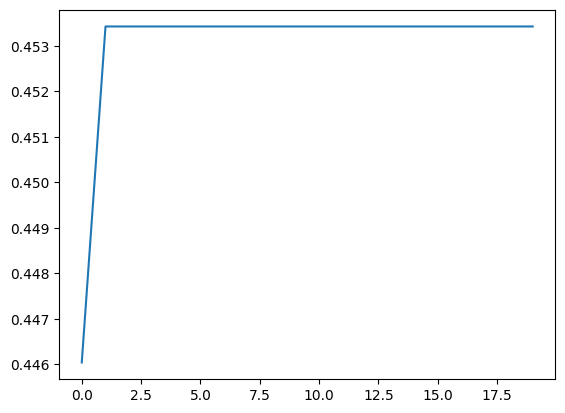

In [64]:
plt.plot(history.history["accuracy"])
plt.show()

In [65]:
y_pred = LSTMClassif.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
accuracy_score(y_pred, y_test)
# .45 - Correct RBM Size, 10 Iter
#

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.45601851851851855

In [32]:
LSTMClassif.fit(X_train, y_train)
# LSTMPipe.fit(X_train, y_train)

Epoch 1/100


918/918 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4580 - loss: 1.1095
Epoch 2/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5038 - loss: 1.0420
Epoch 3/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6517 - loss: 0.8817
Epoch 4/100
688/918 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8010 - loss: 0.5502

KeyboardInterrupt: 

In [ ]:
# y_pred = LSTMPipe.predict(X_test)
y_pred = LSTMClassif.predict(X_test)
accuracy_score(y_test, y_pred) * 100
# LSTM Only = 89%
# LSTM (10 epochs) + 1 RBM = 50.42

230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step


50.422113289760354